In [28]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Set a style for the plots
sns.set_style("whitegrid")

In [21]:
# Load the built-in Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Display the first 5 rows of the feature data
print("Features (X):")
print(X.head())


Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [22]:
print("\\nTarget (y):")
print(y.head())

\nTarget (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


Generating Pair Plot...


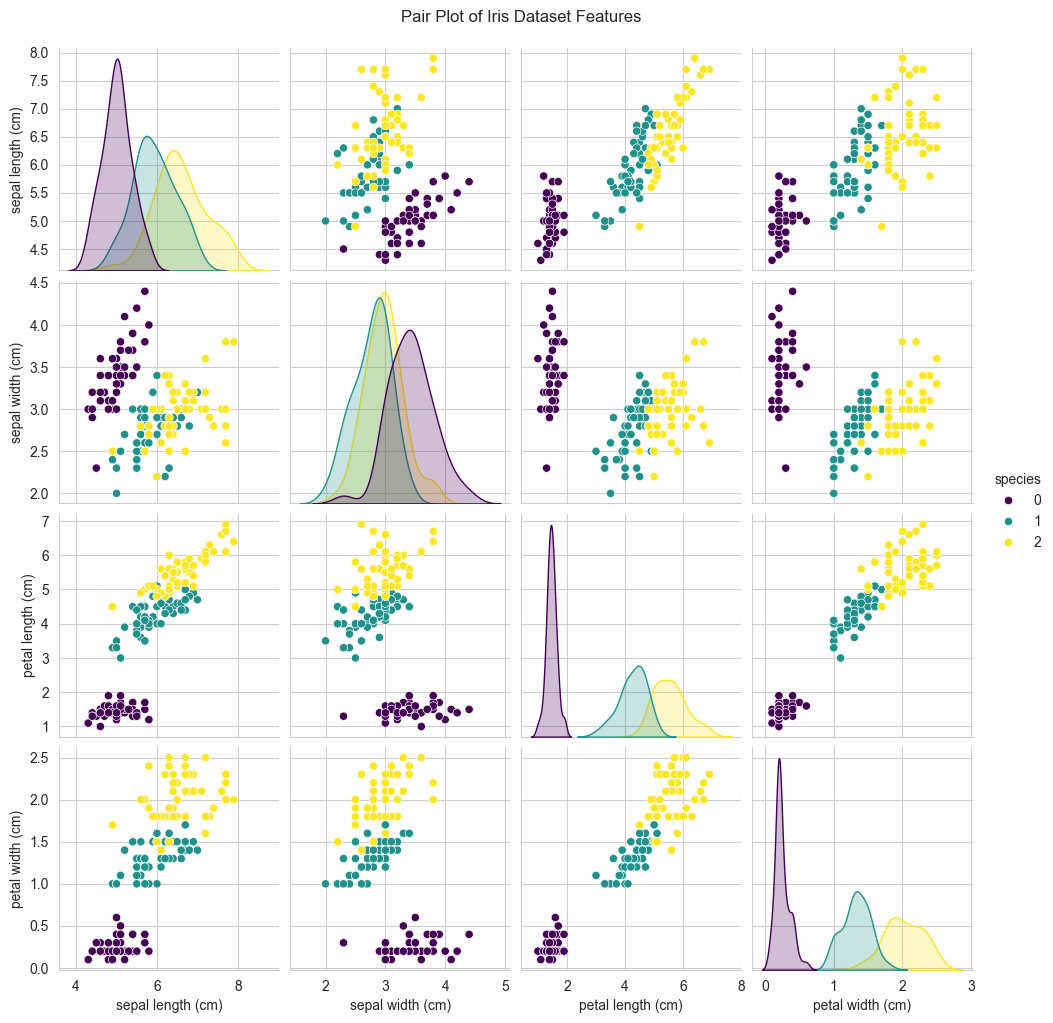

\nGenerating Correlation Heatmap...


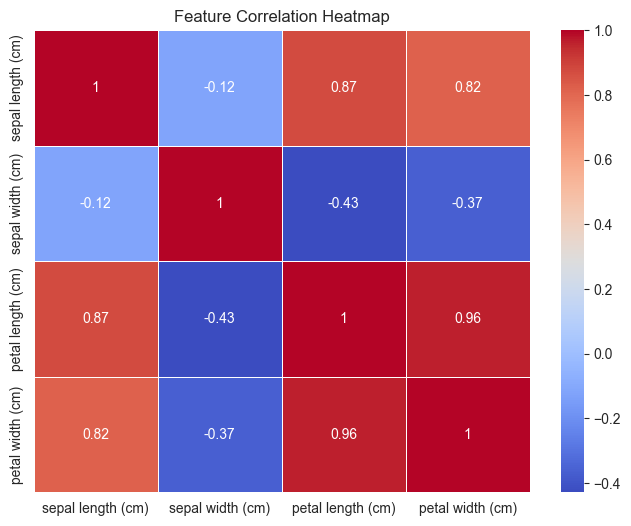

In [31]:
# Create a combined DataFrame for plotting
df_iris = X.copy()  # Start by copying the features
df_iris['species'] = y # Add the target series as a new column named 'species'

# Use seaborn's pairplot to visualize relationships between features
# The 'hue' parameter colors the points by species
print("Generating Pair Plot...")
sns.pairplot(df_iris, hue="species", palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

# Create a heatmap of the feature correlation
print("\\nGenerating Correlation Heatmap...")
plt.figure(figsize=(8, 6))
# We use X.corr() here because we only want to correlate the numeric features
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


Generating Confusion Matrix...


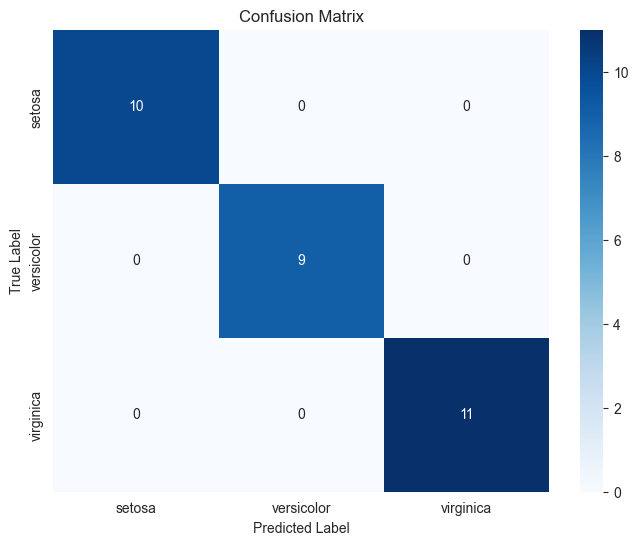

\nGenerating Feature Importance Plot...


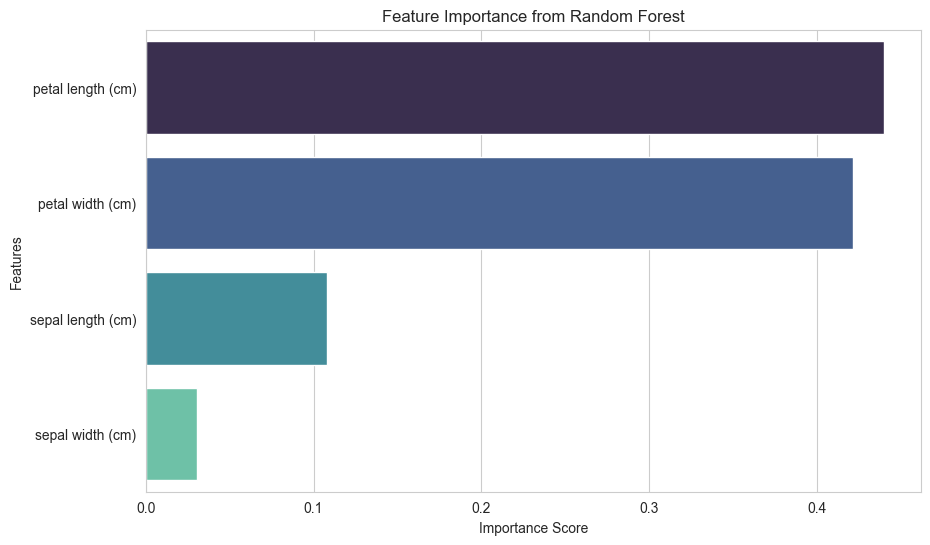

In [30]:
# 1. Confusion Matrix
print("Generating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("iris_confusion_matrix.png")
plt.show()

# 2. Feature Importance
print("\\nGenerating Feature Importance Plot...")
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='mako')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.savefig("iris_feature_importance.png")
plt.show()

In [26]:
# Define a file path for the saved model
model_filename = 'random_forest_iris_model.joblib'

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"Model saved successfully to '{model_filename}'")

Model saved successfully to 'random_forest_iris_model.joblib'


In [32]:
# Load the model from the file
loaded_model = joblib.load(model_filename)

# You can now use the loaded_model to make predictions
sample_prediction = loaded_model.predict(X_test.head(10))
print(f"Prediction for the first test sample: {sample_prediction}")

Prediction for the first test sample: [1 0 2 1 1 0 1 2 1 1]


In [33]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("-" * 30)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Model Accuracy: 1.00
------------------------------
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

